In [1]:
!pip install wget
import os
import torch
import pandas as pd
import numpy as np
import torch
from torch import nn


ssh_config = """
Host github.com
  IdentityFile ~/.ssh/github.pem
  User davipeag
  StrictHostKeyChecking no
"""

if os.name == 'nt':
  base_path = ""
  REPO_DIR = "."
  STORE_DIR ="." 
  print("Windows")
else:
  print("Unix-like")
  REPO_DIR = "/tmp/HeartRateRegression"
  from google.colab import drive
  drive.mount('/content/drive')
  GIT_PATH = "/content/drive/My\ Drive/deeplearning_project/github.pem"
  DATA_DIR = os.path.join(REPO_DIR, "repo")
  STORE_DIR ="/content/drive/My Drive/deeplearning_project/" 
  !mkdir ~/.ssh
  !cp -u {GIT_PATH} ~/.ssh/
  !chmod u=rw,g=,o= ~/.ssh/github.pem
  !echo "{ssh_config}" > ~/.ssh/config
  !chmod u=rw,g=,o= ~/.ssh/config
  ! (cd /tmp && git clone git@github.com:davipeag/HeartRateRegression.git)
  ! (cd {REPO_DIR} && git pull )
  import sys
  sys.path.append(REPO_DIR)

def git_pull():
  ! (cd {REPO_DIR} && git pull )

git_pull()

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9681 sha256=ee485b8707aec367420bdd21c05d94d6ec36db0889163c9ed2ef1d47de618cd7
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
Unix-like
Mounted at /content/drive
Cloning into 'HeartRateRegression'...
remote: Enumerating objects: 194, done.
remote: Counting objects: 100% (194/194), done.
remote: Compressing objects: 100% (130/130), done.
remote: Total 1557 (delta 118), reused 116 (delta 55), pack-reused 1363
Receiving objects: 100% (1557/1557), 104.17 MiB | 22.78 MiB/s, done.
Resolving deltas: 100% (1017/1017), done.
Already up to date.
Already up to date.


In [10]:
import random
import torch
from torch import nn
import numpy as np
args = {
    'epoch_num': 250,     # Number of epochs.
    'lr': 1.0e-3,           # Learning rate.
    'weight_decay': 10e-4, # L2 penalty.
    'momentum': 0.9,      # Momentum.
    'num_workers': 0,     # Number of workers on data loader.
    'batch_size': 128,     # Mini-batch size. 128
    'batch_test': 248,     # size of test batch
    'window': 15,
    'initial_window':5,
    'clip_norm': 6.0,     # Upper limit on gradient L2 norm ###
}
if torch.cuda.is_available():
    args['device'] = torch.device('cuda')
else:
    args['device'] = torch.device('cpu')

print(args['device'])

SEED = 1234
def reset_seeds():
  random.seed(SEED)
  np.random.seed(SEED)
  torch.manual_seed(SEED)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False
  torch.cuda.manual_seed(SEED)
  torch.backends.cudnn.deterministic = True
  torch.backends.cudnn.benchmark = False

reset_seeds()

cpu


In [6]:
from data_utils import (Pamap2Handler, FormatPamap)

SUBJECTS = list(range(1,9))

handler = Pamap2Handler(DATA_DIR)
formatter = FormatPamap()
dfs_train = [formatter.transform(handler.get_protocol_subject(i)) for i in SUBJECTS]
[len(df)//200 for df in dfs_train]

download


[1882, 2235, 1264, 1647, 1873, 1809, 1567, 2040]

In [7]:
git_pull()

import importlib

import PPG
import preprocessing_utils
from PPG import FullTrainer
import RegressionHR

from RegressionHR import FullTrainer
from RegressionHR import PceLstmDefaults
from RegressionHR import PceLstmModel
from RegressionHR import TrainerJoint
from RegressionHR import  UtilitiesData


importlib.reload(PPG.AttentionDefaults)
importlib.reload(PPG)
importlib.reload(PPG.UtilitiesDataXY)
importlib.reload(PPG.Models)
importlib.reload(PPG.NoHrPceLstmModel)
importlib.reload(PPG.TrainerXY)
importlib.reload(PPG.TrainerIS)
importlib.reload(PPG.FullTrainer)
importlib.reload(PceLstmDefaults)
importlib.reload(preprocessing_utils)
importlib.reload(RegressionHR)
importlib.reload(RegressionHR.FullTrainer)
importlib.reload(RegressionHR.PceLstmDefaults)
importlib.reload(PPG.UtilitiesDataXY)
importlib.reload(preprocessing_utils)
importlib.reload(RegressionHR.TrainerJoint)
importlib.reload(RegressionHR.UtilitiesData)
importlib.reload(RegressionHR.PceLstmModel)
importlib.reload(preprocessing_utils)


Already up to date.


<module 'preprocessing_utils' from '/tmp/HeartRateRegression/preprocessing_utils.py'>

In [8]:
import matplotlib.pyplot as plt
import pickle

def compute_ensemble(results):
  
  ys = [v["predictions"][0].reshape(-1).numpy() for v in results]
  min_len_y = min([len(y) for y in ys])
  ys = [y[:min_len_y] for y in ys]
  for i in range(1, len(ys)-1):
    assert np.all(ys[i] == ys[i-1])
  ps = np.stack([v["predictions"][1].reshape(-1).numpy()[:min_len_y] for v in results])

  s = ps[0]
  for p in ps[1:]:
    s = s + p

  a = s/len(ps)
  y = ys[0]

  plt.figure()

  plt.plot(a)
  plt.plot(y)

  plt.show()

  return np.mean(np.abs(a - y)), np.mean(np.abs(ps - y))



{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 0, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 22.328491


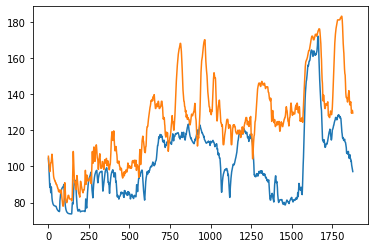

0-TS:(22.328491, 22.328491)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 1, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 11.652277


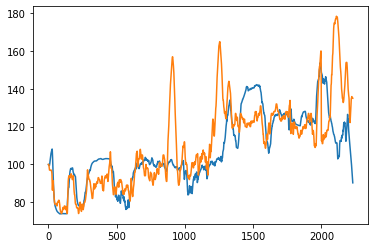

1-TS:(11.652277, 11.652277)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 2, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 11.940713


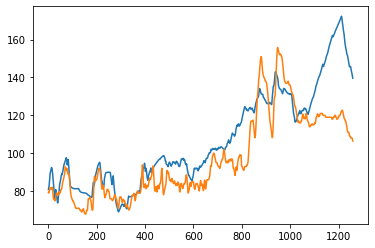

2-TS:(11.940713, 11.940713)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 3, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 24.450378


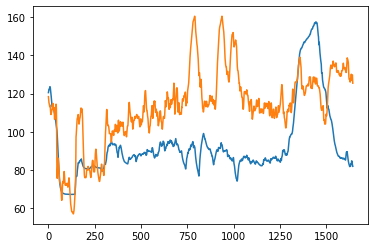

3-TS:(24.450378, 24.450378)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 5, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 15.192866


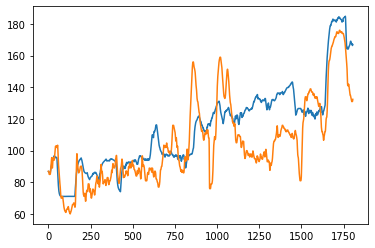

5-TS:(15.192866, 15.192866)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 6, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 28.114685


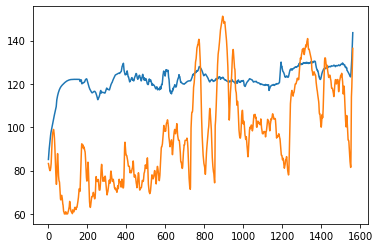

6-TS:(28.114685, 28.114685)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 7, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 36.478


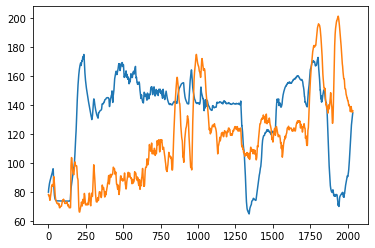

7-TS:(36.478, 36.478)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 0, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 19.600372


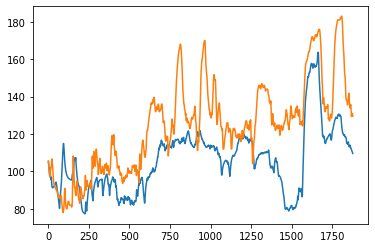

0-TS:(20.22449, 20.964432)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 1, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 13.790299


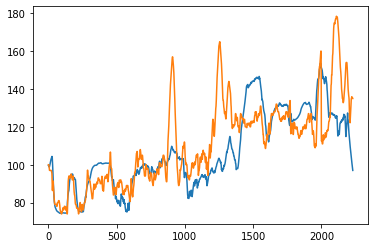

1-TS:(12.263023, 12.721289)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 2, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 14.18932


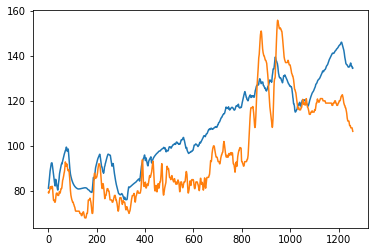

2-TS:(12.815308, 13.065018)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 3, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 19.272476


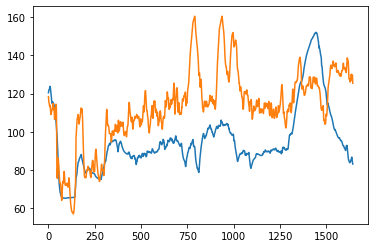

3-TS:(21.641693, 21.861427)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 4, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 22.566422


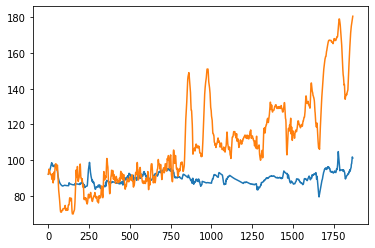

4-TS:(22.566422, 22.566422)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 6, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 19.250372


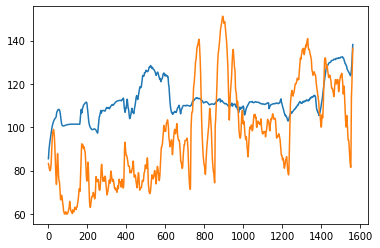

6-TS:(22.509808, 23.68253)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 7, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 35.270714


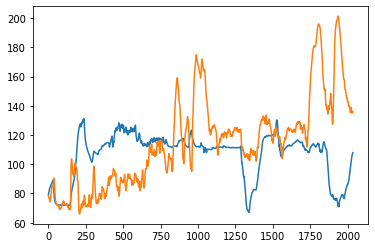

7-TS:(26.410572, 35.87436)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 0, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 22.545408


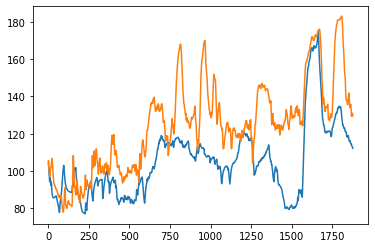

0-TS:(20.299917, 21.491423)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 1, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 10.981092


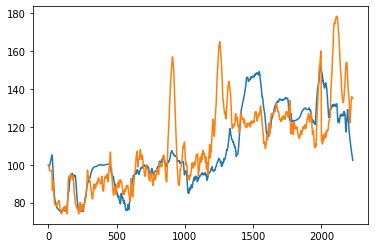

1-TS:(11.555117, 12.141223)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 2, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 7.8910775


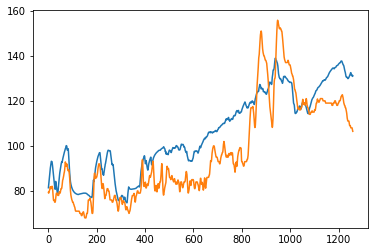

2-TS:(10.951201, 11.340372)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 4, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 22.976892


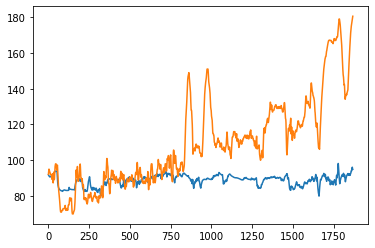

4-TS:(22.557508, 22.771656)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 5, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 19.484365


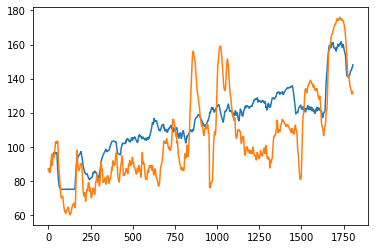

5-TS:(15.767826, 17.338615)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 6, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 15.437254


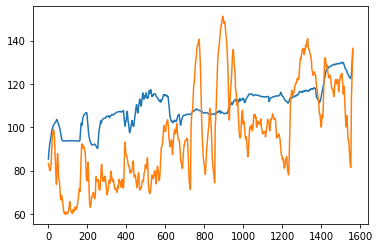

6-TS:(19.719555, 20.934105)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 7, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 33.58521


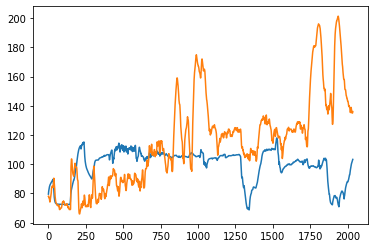

7-TS:(27.177048, 35.11131)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 0, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 20.353592


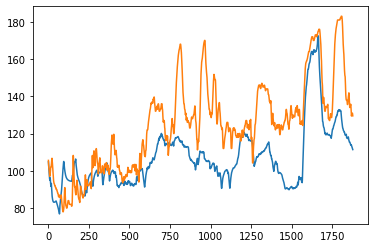

0-TS:(18.882347, 21.206964)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 1, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 24.542439


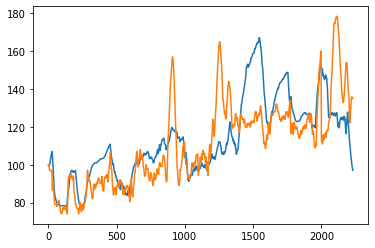

1-TS:(13.026209, 15.241528)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 3, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 17.943024


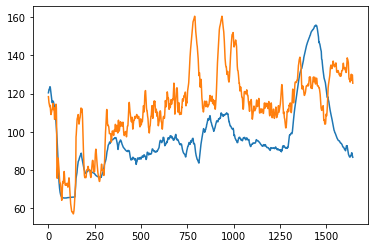

3-TS:(20.316704, 20.555292)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 4, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 14.003348


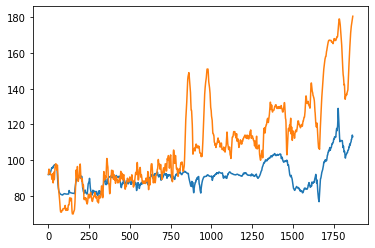

4-TS:(19.402788, 19.848888)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 5, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 15.351413


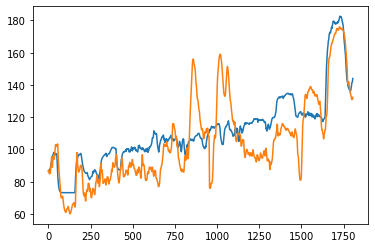

5-TS:(14.015188, 16.676214)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 6, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 14.382725


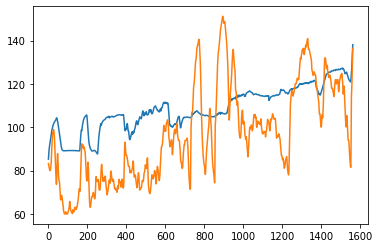

6-TS:(18.077463, 19.296259)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 7, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 28.35344


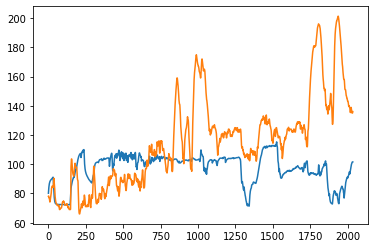

7-TS:(27.226273, 33.42184)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 0, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 30.229742


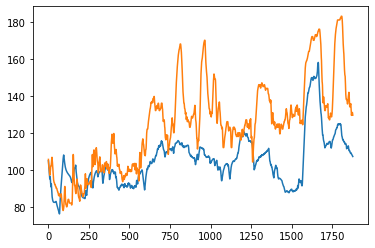

0-TS:(21.002693, 23.011522)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 2, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 11.337254


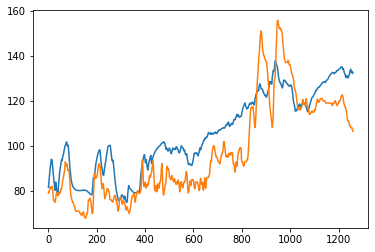

2-TS:(10.982543, 11.339591)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 3, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 18.683455


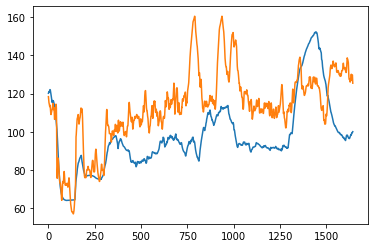

3-TS:(19.722813, 20.087334)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 4, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 12.121628


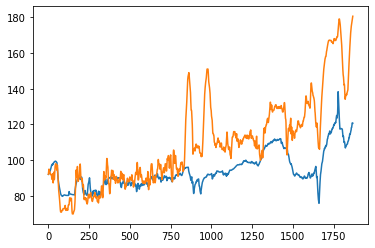

4-TS:(16.752747, 17.917072)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 5, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 13.307412


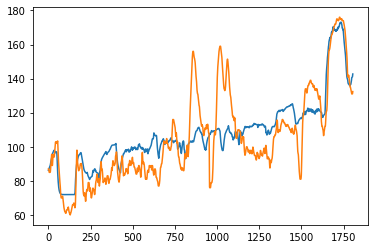

5-TS:(12.079313, 15.834014)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 6, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 18.387548


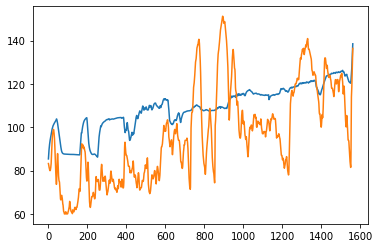

6-TS:(18.060001, 19.114515)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 7, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 31.040262


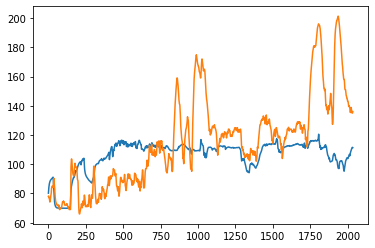

7-TS:(21.20715, 32.945526)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 1, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 13.05065


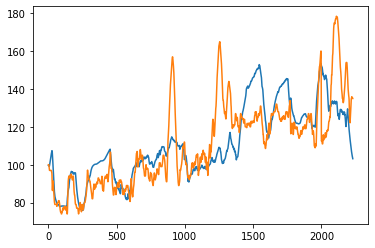

1-TS:(11.641394, 14.80335)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 2, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 9.647335


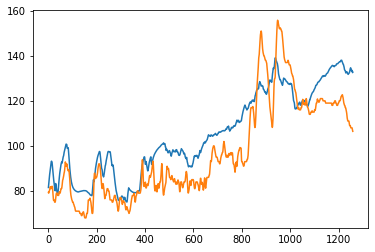

2-TS:(10.671613, 11.001141)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 3, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 18.791914


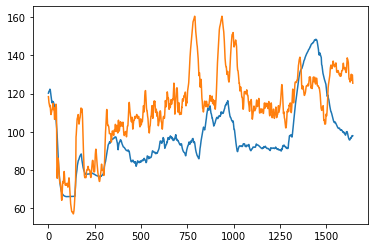

3-TS:(19.436811, 19.828249)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 4, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 14.280108


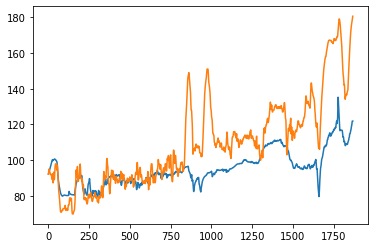

4-TS:(16.007296, 17.18968)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 5, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 15.211756


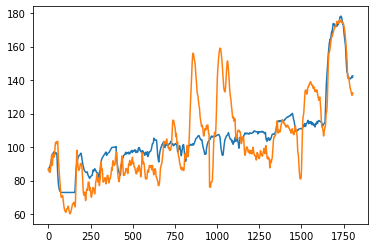

5-TS:(11.479268, 15.709562)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 6, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 19.891745


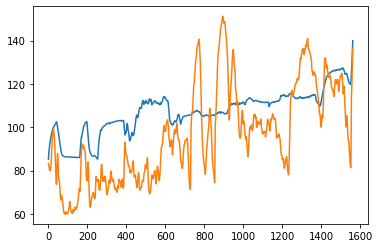

6-TS:(17.81525, 19.244055)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 7, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 26.328129


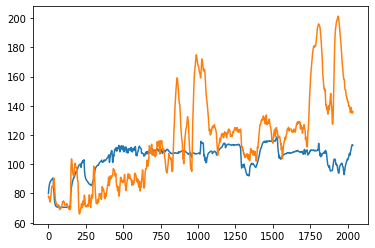

7-TS:(21.6179, 31.842625)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 0, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 17.878273


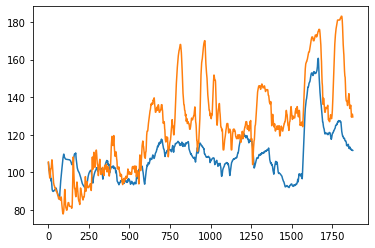

0-TS:(18.823225, 22.15598)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 1, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 15.817508


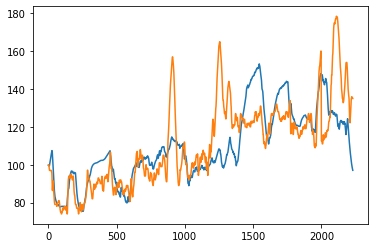

1-TS:(12.095664, 14.972378)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 2, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 11.525922


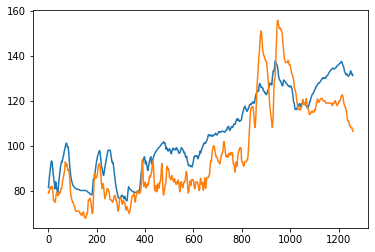

2-TS:(10.771482, 11.088604)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 3, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 20.825008


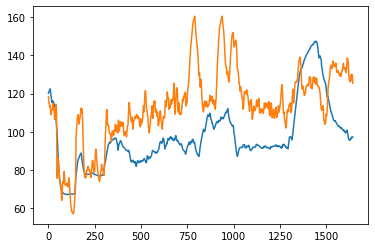

3-TS:(19.654974, 19.994375)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 4, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 21.782158


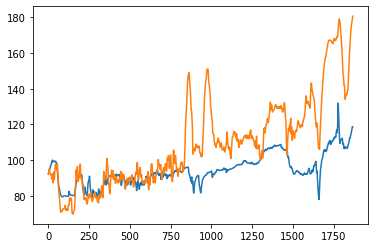

4-TS:(16.89017, 17.955091)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 5, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 23.77693


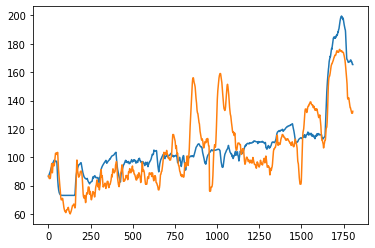

5-TS:(13.306633, 17.054123)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 7, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 32.29637


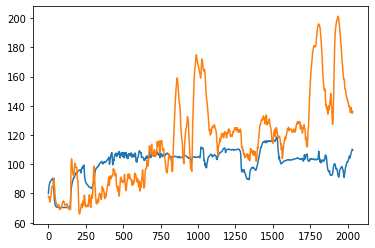

7-TS:(22.673885, 31.907446)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 0, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 32.726418


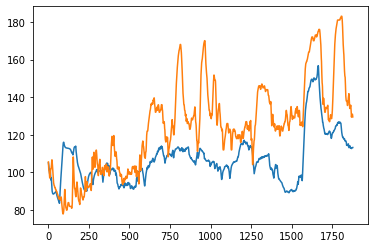

0-TS:(20.66645, 23.666044)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 1, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 14.799666


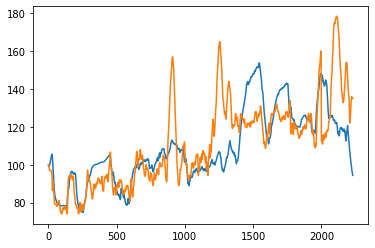

1-TS:(12.267544, 14.947704)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 2, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 8.129363


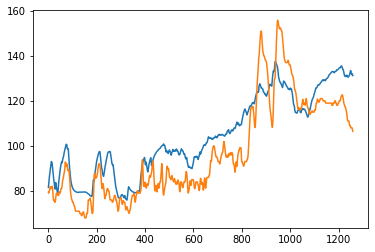

2-TS:(10.225488, 10.665855)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 3, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 15.2736635


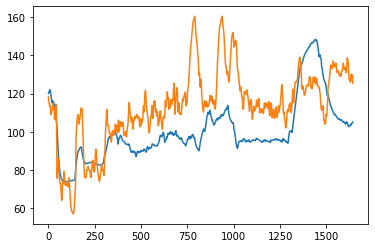

3-TS:(17.522959, 19.319986)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 4, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 14.783116


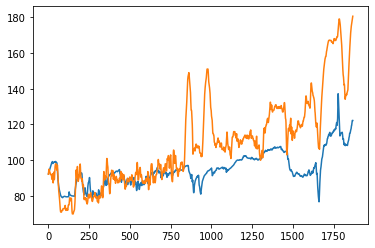

4-TS:(16.367207, 17.501953)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 5, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 16.038979


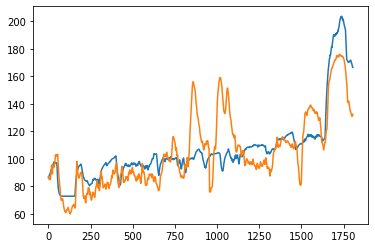

5-TS:(13.137459, 16.909103)
{'net_args': {'layer_sizes': (16, 16, 16), 'skip_mapping': ((0, 2), (0, 3), (1, 3)), 'dropout_rate': 0.1, 'input_features': 7}, 'period_s': 4, 'step_s': 2, 'ts_per_sample': 30, 'ts_sub': 6, 'batch_size': 64, 'weight_decay': 1e-05, 'lr': 0.005} 14.619072


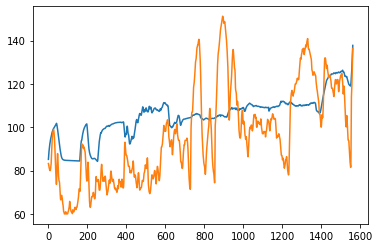

6-TS:(16.925034, 18.583342)


In [12]:

fchoice = {
    'layer_sizes': (16, 16, 16),
    'skip_mapping': ((0, 2), (0, 3), (1, 3)),
    'dropout_rate': 0.1,
    'input_features': 7,
    'period_s': 4,
    'step_s': 2,
    'ts_per_sample': 30,
    'ts_sub': 5,
    'batch_size': 64,
    'weight_decay': 1e-05,
    'lr': 0.005
}


from PPG import UtilitiesDataXY
from collections import defaultdict
nepoch = 100
aresults = defaultdict(dict)
for val_sub in [4,5,3,2,1,0,6,7]:
  for ts_sub in range(8):
    if val_sub == ts_sub:
      continue
    fchoice["ts_sub"] = ts_sub
    # fchoice["val_sub"] = val_sub
    filename = f"pamap_ts_ffnn_{ts_sub}_val_{val_sub}_nepoch_{nepoch}.pkl"
    save_path = os.path.join(STORE_DIR, filename)
    try:
      with open(save_path , "rb") as f:
        out = pickle.load(f)
    except FileNotFoundError:
      full_trainer = RegressionHR.FullTrainer.IteractiveFFNNFullTrainerJointValidation(dfs_train, args["device"], nepoch)
      try:
        out = full_trainer.train(**fchoice)
        with open(save_path, "wb") as f:
          pickle.dump(out, f)

      except RuntimeError as e:
        if isinstance(e, KeyboardInterrupt):
          raise e
        else:
          print("####")
          print(f"Failed: {choice}")
          print("###")
    
    print(out["args"], out["metric"])
    aresults[ts_sub][val_sub] = out
    print(f"{ts_sub}-TS:{compute_ensemble(list(aresults[ts_sub].values()))}")
    



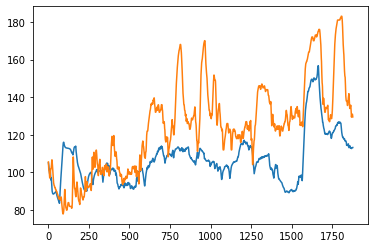

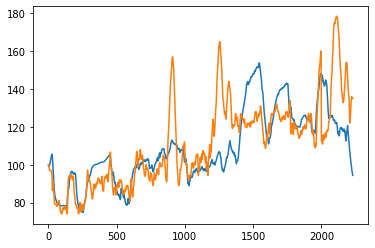

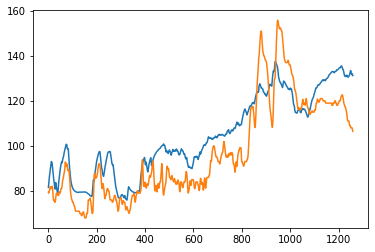

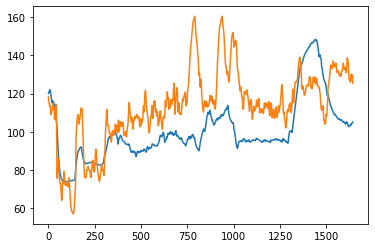

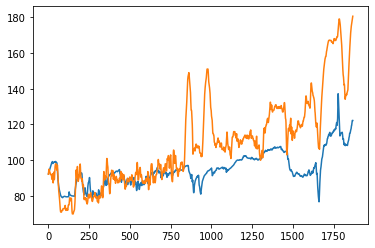

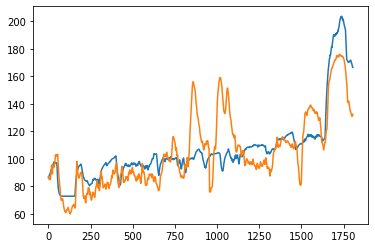

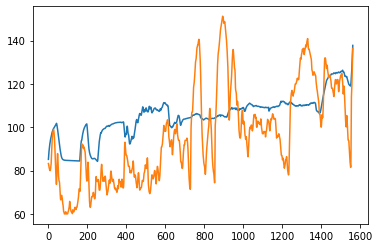

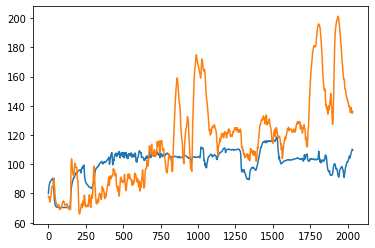

{0: (20.66645, 23.666044),
 1: (12.267544, 14.947704),
 2: (10.225488, 10.665855),
 3: (17.522959, 19.319986),
 4: (16.367207, 17.501953),
 5: (13.137459, 16.909103),
 6: (16.925034, 18.583342),
 7: (22.673885, 31.907446)}

In [14]:
metrics = dict()
for ts_sub in range(8):
  metrics[ts_sub] = (compute_ensemble(list(aresults[ts_sub].values())))
  
metrics